In [54]:
from sklearn.metrics import confusion_matrix,classification_report
import pandas
import pandas as pd
from sklearn.svm import SVC,SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
import seaborn as sns
from sklearn import svm
import numpy as np
from sklearn.multioutput import MultiOutputClassifier
from imblearn.over_sampling import SMOTE
import xgboost as xgb

reading and displaying the dataframe

In [18]:
df = pandas.read_csv("predictive_maintenance.csv")
print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure  


finding different types of values in type and faliure type

In [19]:
print("Unique values in 'Type':", df['Type'].unique())
print("Unique values in 'Failure Type':", df['Failure Type'].unique())

Unique values in 'Type': ['M' 'L' 'H']
Unique values in 'Failure Type': ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


removing extra spaces if any

In [ ]:
df['Type'] = df['Type'].str.strip()
df['Failure Type'] = df['Failure Type'].str.strip()

mapping Type and Failure Type as numeric charecters

In [ ]:
# Assign specific integer values to 'Type' categories
type_mapping1 = {'M': 0, 'L': 1, 'H': 2}
df['Type'] = df['Type'].map(type_mapping1)

# Assign specific integer values to 'Failure Type' categories
type_mapping2 = {
    'No Failure': 0, 
    'Power Failure': 1, 
    'Tool Wear Failure': 2,
    'Overstrain Failure': 3,
    'Random Failures': 4, 
    'Heat Dissipation Failure': 5
}
df['Failure Type'] = df['Failure Type'].map(type_mapping2)

finding empty values

In [ ]:
print(df[['Type', 'Failure Type']].isna().sum())


Type            0
Failure Type    0
dtype: int64


In [ ]:
print(df.head())

   UDI Product ID  Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860     0                298.1                    308.6   
1    2     L47181     1                298.2                    308.7   
2    3     L47182     1                298.1                    308.5   
3    4     L47183     1                298.2                    308.6   
4    5     L47184     1                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  Failure Type  
0                    1551         42.8                0       0             0  
1                    1408         46.3                3       0             0  
2                    1498         49.4                5       0             0  
3                    1433         39.5                7       0             0  
4                    1408         40.0                9       0             0  


dropping product id (no effect on predictions)

In [ ]:

df = df.drop('Product ID', axis=1)

print(df.head())

   UDI  Type  Air temperature [K]  Process temperature [K]  \
0    1     0                298.1                    308.6   
1    2     1                298.2                    308.7   
2    3     1                298.1                    308.5   
3    4     1                298.2                    308.6   
4    5     1                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  Failure Type  
0                    1551         42.8                0       0             0  
1                    1408         46.3                3       0             0  
2                    1498         49.4                5       0             0  
3                    1433         39.5                7       0             0  
4                    1408         40.0                9       0             0  


making corelation matrix to find most corelated feature

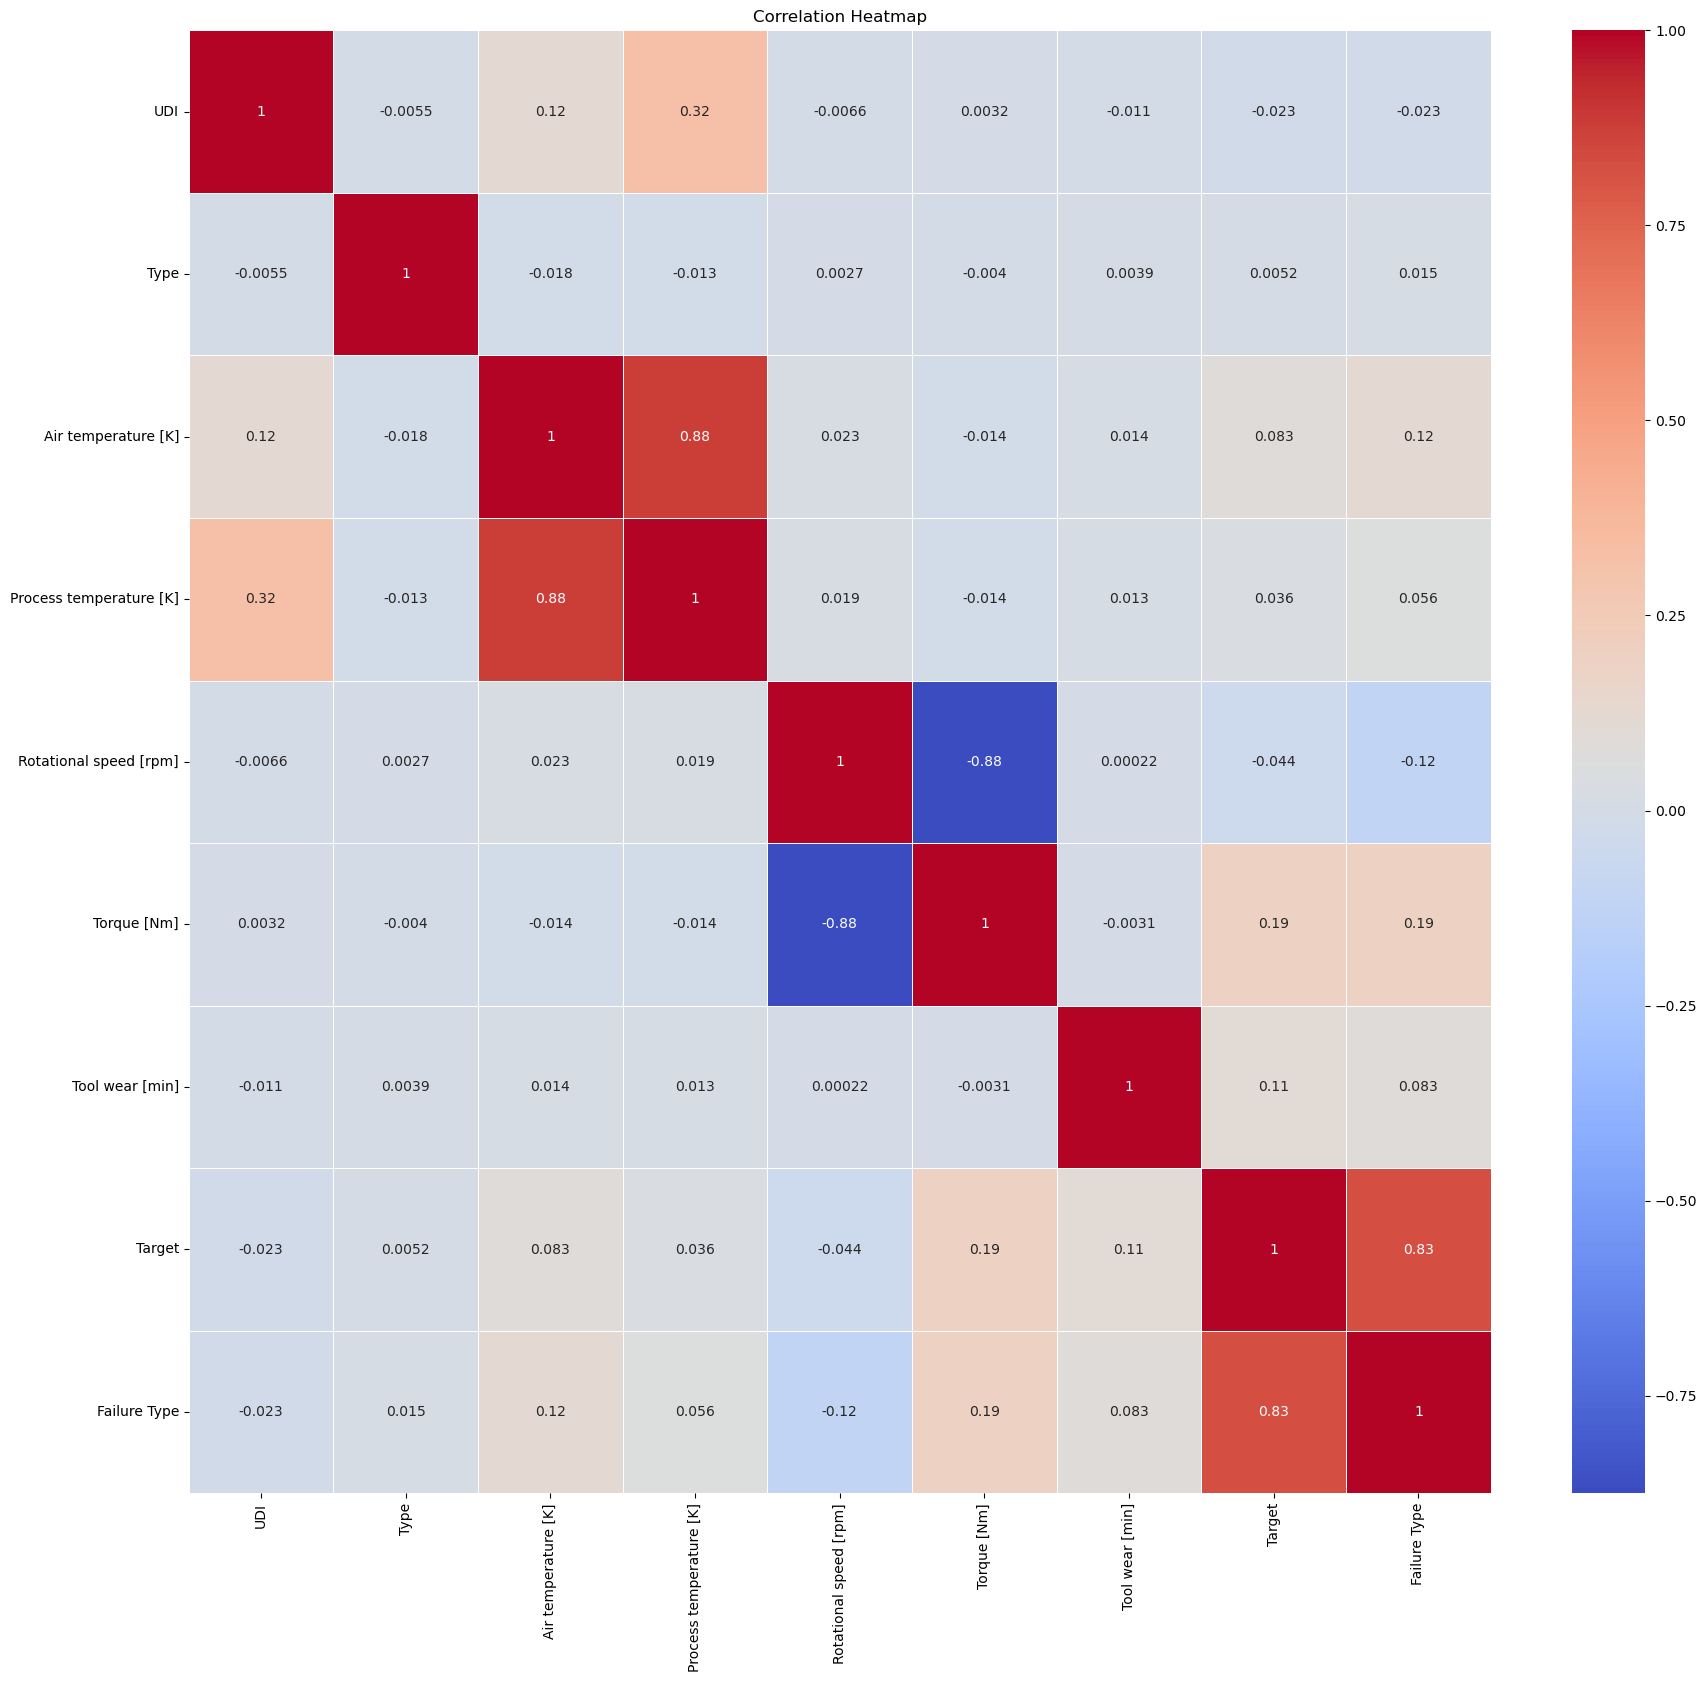

In [ ]:
df['Target'] = (df['Target'] == 1)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(21, 19))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

finding empty entries

In [ ]:
# Check for missing values in each column
missing_values = df.isna().sum()

# Display the columns with missing values
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
UDI                        0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


making pair plot of any 3 parameters which affect faliure to visualize the scale

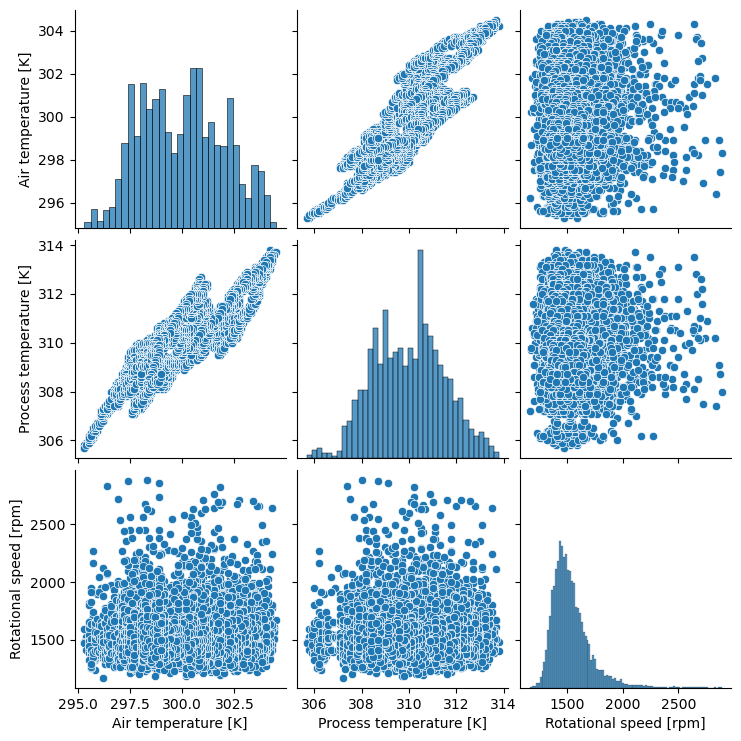

In [ ]:
df_subset = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]']]

# Generate the pairplot for the specified columns
sns.pairplot(df_subset)

# Show the plot
plt.show()

histogram for additional info

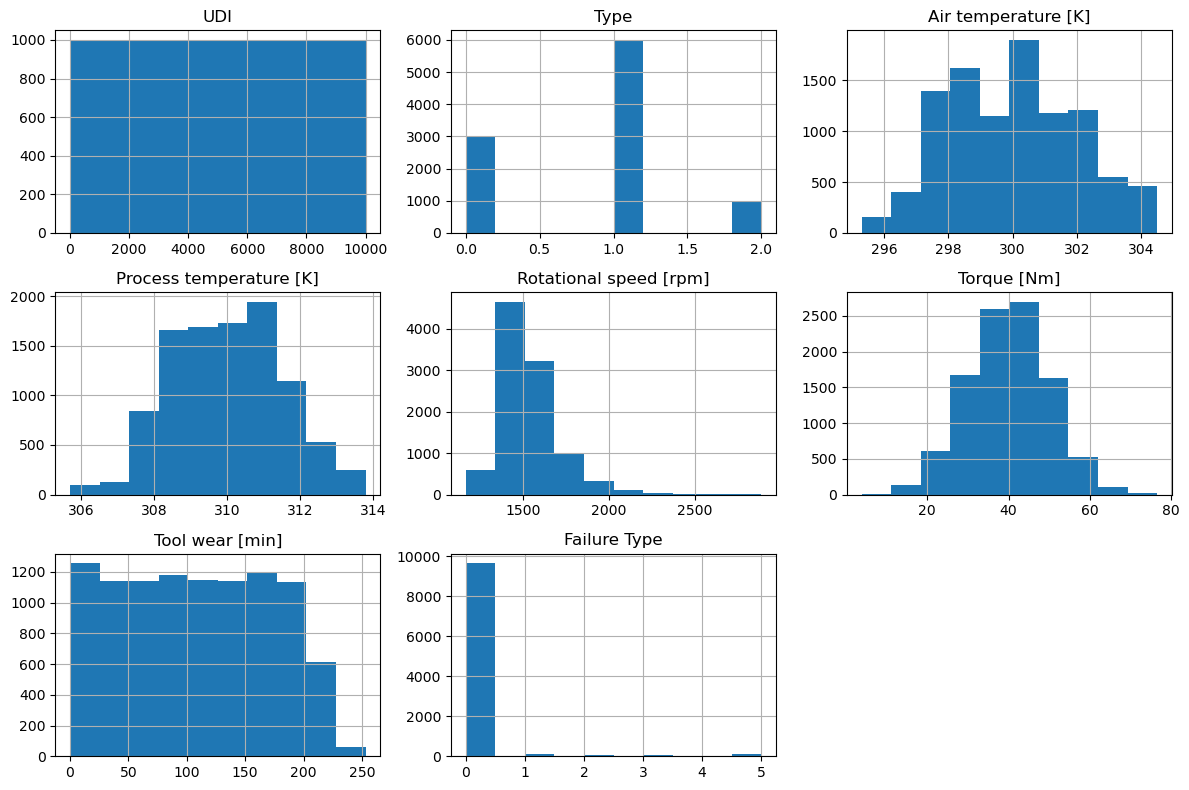

In [ ]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

normalising the data such that all values fall in a uniform bracket

In [ ]:
scaler=MinMaxScaler()
df2=df.copy()
df2=scaler.fit_transform(df)
df2=pd.DataFrame(df2)
df2.describe().round(2)

,0,1,2,3,4,5,6,7,8
count,10000.00,10000.0,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,0.50,0.4,0.51,0.53,0.22,0.50,0.43,0.03,0.02
std,0.29,0.3,0.22,0.18,0.10,0.14,0.25,0.18,0.13
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.25,0.0,0.33,0.38,0.15,0.40,0.21,0.00,0.00
50%,0.50,0.5,0.52,0.54,0.19,0.50,0.43,0.00,0.00
75%,0.75,0.5,0.67,0.67,0.26,0.59,0.64,0.00,0.00
max,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
print(df2.columns)


RangeIndex(start=0, stop=9, step=1)


selecting and splitting target and training data

In [ ]:
selected_indices = [2, 3, 4, 5, 6, 7]  

selected_indices = [i for i in selected_indices if i < len(df.columns)]


top_features = df.columns[selected_indices]

print("Top correlated features:", top_features)

X = df[top_features]
y = df['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Top correlated features: Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')


Predictions using Support vector machine and regularization using grid search

In [ ]:
clf = SVC(kernel='rbf')

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predicting and evaluating on the test set
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


veiwing results with classification report and confusion matrix

In [ ]:
report1 = classification_report(y_test, y_pred)
conf_matrix1 = confusion_matrix(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix1}')
print('')
print('')

print(f'clasification report:\n{report1}')

Confusion Matrix:
[[1929    0]
 [   0   71]]


clasification report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1929
        True       1.00      1.00      1.00        71

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



selecting and splitting target and training data for different approach

In [ ]:
selected_indices = [2, 3, 4, 5, 6, 7]
top_features = df.columns[selected_indices]
print("Top correlated features:", top_features)

# Define target columns
target_columns = ['Target', 'Failure Type']


X = df[top_features]
y = df[target_columns]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SVM classifier with 'rbf' kernel
clf = SVC()

# Wrap the SVM in a MultiOutputClassifier
multi_target_clf = MultiOutputClassifier(clf)

# Define the parameter grid for GridSearchCV
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__gamma': [1, 0.1, 0.01],
    'estimator__kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=multi_target_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predicting and evaluating on the test set
y_pred = best_model.predict(X_test)

Top correlated features: Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')
Fitting 5 folds for each of 18 candidates, totalling 90 fits


c:\Users\Aem\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


veiwing results with classification report and confusion matrix

In [ ]:
for i, target in enumerate(target_columns):
    print(f"Results for {target}:\n")
    
    report = classification_report(y_test[target], y_pred[:, i])
    conf_matrix = confusion_matrix(y_test[target], y_pred[:, i])
    
    print(f'Confusion Matrix:\n{conf_matrix}\n')
    print(f'Classification Report:\n{report}\n')

Results for Target:

Confusion Matrix:
[[1939    0]
 [  61    0]]

Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98      1939
        True       0.00      0.00      0.00        61

    accuracy                           0.97      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.94      0.97      0.95      2000


Results for Failure Type:

Confusion Matrix:
[[1935    0    0    0    0    0]
 [  20    0    0    0    0    0]
 [  11    0    0    0    0    0]
 [  13    0    0    0    0    0]
 [   6    0    0    0    0    0]
 [  15    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00

c:\Users\Aem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aem\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Aem\anaconda3\Lib\site-packages\sklea

selecting and splitting target and training data for different approach

predictions made with xgboost and regularization

veiwing results with classification report and confusion matrix

In [ ]:
selected_indices = [2, 3, 4, 5, 6, 7]
top_features = df.columns[selected_indices]
print("Top correlated features:", top_features)

target_columns = ['Target', 'Failure Type']
X = df[top_features]
y = df[target_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
clf = xgb.XGBClassifier()

# Wrap the XGBoost in a MultiOutputClassifier
multi_target_clf = MultiOutputClassifier(clf)

# Define the parameter grid for GridSearchCV
param_grid = {
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 5, 7],
    'estimator__n_estimators': [100, 200, 300]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=multi_target_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predicting and evaluating on the test set
y_pred = best_model.predict(X_test)

# Evaluation for 'Target'
print("Results for Target:")
conf_matrix_target = confusion_matrix(y_test['Target'], y_pred[:, 0])
report_target = classification_report(y_test['Target'], y_pred[:, 0])
print(f'Confusion Matrix:\n{conf_matrix_target}')
print(f'Classification Report:\n{report_target}')



Top correlated features: Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\Aem\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Results for Target:
Confusion Matrix:
[[1939    0]
 [   0   61]]
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1939
        True       1.00      1.00      1.00        61

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

